# Personal Loan Campaign Modelling

### 1.Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [97]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Model specific libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [98]:
# Importing Dataset

loan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [99]:
# Checking datatype
print()
print(loan.info())

# Shape
print()
print("Shape of Loan dataset is :", loan.shape)

# Null values
print()
print(loan.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None

Shape of Loan dataset is : (5000, 14)

ID        

In [100]:
# Statistical summary
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


##### Insights:
1. Dataset has 5000 rows and 14 columns with no null values
2. From Statistical summary, we can observe that Experience has minimum value of -3. Experience can be 0 but not negative. This is most likely a typo and has to be corrected (Check number of rows with -3 as values. Check for other negative values. Either remove (-)sign or replace with mode/median)
3. Securities Account, CD Account, Online and CreditCard are all Boolean columns with Yes/No answers denoted by 1 or 0
4. Family and Education are also categorical values with each taking 4 and 3 values respectively
5. Mortgage has values from the third quartile with potentially many outliers

In [101]:
#Incorrect Imputation
#Correcting -ve values in Experience
#Find unique values
print(loan['Experience'].value_counts())


 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64


In [102]:
# Negative values to be replaced: -1, -2, -3
# Replacing with Mean 20 or Mode 32 may be excessive. So I will make the values absolute
loan['Experience'] = loan['Experience'].abs()
print(loan['Experience'].value_counts())

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
27    125
17    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64


### 2. EDA 
 

In [103]:
#Number of unique in each column
loan.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

##### Insights:
ID has unique value for each row. We can safely assume that ID won't have an impact on the dependent variable, Personal Loan and hence can be dropped as part of getting data model ready

In [104]:
#Number of people with zero mortgage
#loan[loan['Mortgage'] == 0]
print('Number of people with zero mortgage = ',len(loan[loan['Mortgage'] == 0]))

Number of people with zero mortgage =  3462


In [105]:
#Number of people with zero Credit card spending per month
#CCAvg 
print('Number of people with zero Credit Card spending per month = ',len(loan[loan['CCAvg'] == 0]))

Number of people with zero Credit Card spending per month =  106


In [106]:
#Value counts of all categorical columns
#Categorical columns = Family, Education, Securities Account, CD Account, Online, CreditCard
for i in ['Family','Education','Securities Account','CD Account','Online','CreditCard']:
    print(loan[i].value_counts(normalize=True)) #Percentage of value counts
    

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64
0    0.9396
1    0.0604
Name: CD Account, dtype: float64
1    0.5968
0    0.4032
Name: Online, dtype: float64
0    0.706
1    0.294
Name: CreditCard, dtype: float64


Note: 93% of the customers do not have Securities Account. But it's worth doing a bi-variate analysis before deciding if this field can be dropped or not.

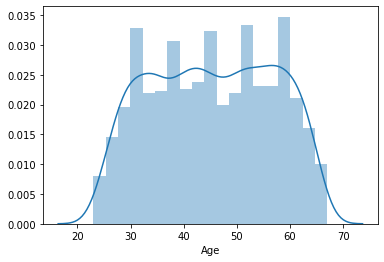

-0.02934068151284029


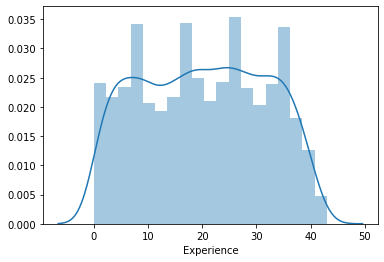

-0.010037994995886824


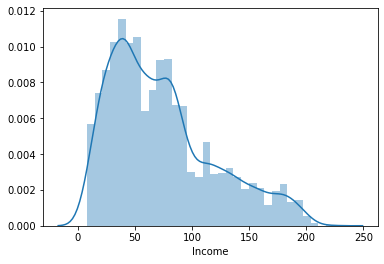

0.8413386072610816


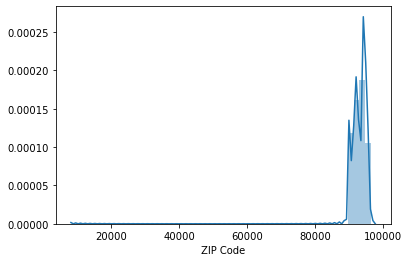

-12.500221098132892


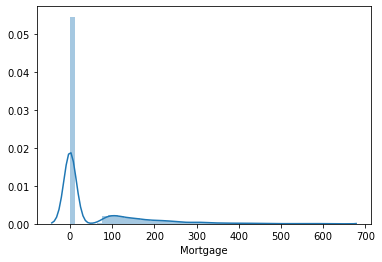

2.1040023191079444


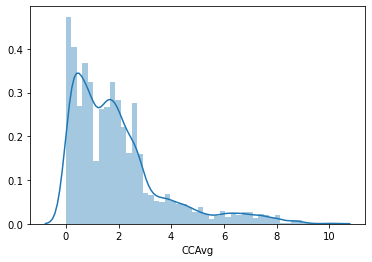

1.5984433366678663


In [107]:
# Univariate Analysis
# Considering that we have the distribution or value counts of categorical columns in above cell, i will do univariate analysis
# on continuos value features
for i in ['Age','Experience','Income','ZIP Code','Mortgage','CCAvg']:
    sns.distplot(loan[i])
    plt.show()
    print(loan[i].skew())

##### Univariate analysis Insights:
1. Age and Experience are almost normally distributed
2. Income, Mortgage and CCAvg are skewed but let's retain them as-is for the model since removing them might negatively impact the model more
3. Zip code is highly skewed and logically it makes more sense to drop the field

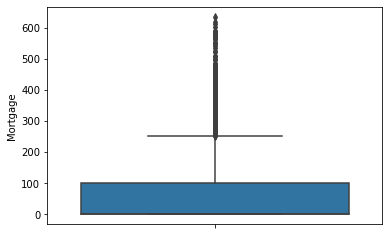

0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64

In [108]:
# Mortgage Analysis 
sns.boxplot(loan['Mortgage'],orient='v')
plt.show()
loan['Mortgage'].value_counts(normalize=True)

##### Univariate Analysis (contd):
1. From above box plot, it is evident that majority of Mortgage values are outliers
2. Almost 70% of the liability customers have 0 mortgages. We can deduce that the actual value of the mortgage may not impact the model more

In [109]:
#Bi-variate Analysis

#Dependecy Variable = Personal Loan

print(loan['Personal Loan'].value_counts())
loan.groupby(['Personal Loan']).mean()

0    4520
1     480
Name: Personal Loan, dtype: int64


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.165487,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


##### Bi-variate analysis Insights:
1. ID and Zip code can clearly be dropped as they are mostly unique for all the rows
2. Age, Experience, Family, Online and CreditCard have no major difference between the customers who accepted Personal Loan and who didn't. But we will retain these fields until we check the model accuracy
3. Income, CCAvg, Mortgage seem to have high impact on Personal Loan acceptance of customers. But we have also deduced that the actual value of Mortgage may not impact the model more since majority of the values are outliers.

In [110]:
# Cross tab for categorical values
for i in ['Family','Education','Securities Account','CD Account','Online','CreditCard']:
    print(pd.crosstab(loan[i],loan['Personal Loan'],normalize='columns'))
    print()

Personal Loan         0         1
Family                           
1              0.301991  0.222917
2              0.263274  0.220833
3              0.194027  0.277083
4              0.240708  0.279167

Personal Loan         0         1
Education                        
1              0.443142  0.193750
2              0.270133  0.379167
3              0.286726  0.427083

Personal Loan              0      1
Securities Account                 
0                   0.897788  0.875
1                   0.102212  0.125

Personal Loan         0         1
CD Account                       
0              0.964159  0.708333
1              0.035841  0.291667

Personal Loan         0        1
Online                          
0              0.404204  0.39375
1              0.595796  0.60625

Personal Loan         0         1
CreditCard                       
0              0.706416  0.702083
1              0.293584  0.297917



##### Bi-variate analysis Insights (contd):
1. Families with higher number of members will accept personal loans
2. Graduates and Advanced/Professionals accept personal loans more than undergraduates
3. Customers without Securities account has higher personal loans acceptance rate
4. Customers without Deposit accounts will accept personal loans more than customers with deposit accounts
5. Customers with Online accounts will take personal loans than customers without online accounts
6. Customers without credit card will take personal loans than customers with credit card usage

In [111]:
# Get data model ready

# Drop Loan ID and Zip code columns
loan.drop(['ID'],axis=1,inplace=True)
loan.drop(['ZIP Code'],axis=1,inplace=True)
#loan.drop(['Experience'],axis=1,inplace=True)

In [112]:
# Category conversion of Mortgage data based on Univariate and Bivariate analyses/insights
loan['Mortgage'].mask(loan['Mortgage'] > 0, 1, inplace=True)


In [113]:
# Making the dependent variable and relevant features as data type 'category' where possible

loan['Family'] = loan['Family'].astype('category')
loan['Education'] = loan['Education'].astype('category')
loan['Mortgage'] = loan['Mortgage'].astype('category')

# Make Dependent variable category datatype
loan['Personal Loan'] = loan['Personal Loan'].astype('category')


### 3. Split the data into Training and Test set in 70:30 ratio

In [114]:
#Define X and Y variables
X = loan.drop('Personal Loan',axis=1)
Y = loan['Personal Loan']


In [115]:
#Get Dummy variables for category datatype features
X = pd.get_dummies(X, drop_first=True)

In [116]:
##Split data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

### 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix 

In [117]:
# Import all model metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,accuracy_score

loanmodel = LogisticRegression(random_state=7,fit_intercept=False)

#Apply model on training data
loanmodel.fit(X_train, y_train)                 

LogisticRegression(fit_intercept=False, random_state=7)

In [118]:
#Apply model on X test data to get predicted value of Y or Yhat
y_predict = loanmodel.predict(X_test) 

In [119]:
#Compare y_test with y_predict values
#Copy X into a new dataframe which can be appended with y_test and y_Predict
output = X_test.copy()
output['Observed Personal Loan'] = y_test
output['Predicted Personal Loan'] = y_predict
output.head()

,Age,Experience,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_1,Observed Personal Loan,Predicted Personal Loan
3406,42,12,34,2.0,0,0,0,1,0,1,0,0,1,0,0,0
757,52,28,81,1.8,1,0,0,0,0,1,0,1,0,0,0,0
3624,58,28,70,1.4,0,0,0,0,0,0,0,0,1,0,0,0
4544,28,4,80,2.5,0,0,1,0,0,1,0,0,0,0,0,0
3235,60,35,39,1.6,0,0,1,0,1,0,0,0,1,0,0,0


In [120]:
# Model metrics

print('Training accuracy = ',loanmodel.score(X_train,y_train))
print()
print('Testing accuracy = ',loanmodel.score(X_test, y_test))
print()
print('Recall = ',recall_score(y_test,y_predict))
print()
print('Precision = ',precision_score(y_test,y_predict))
print()
print('F1 score = ',f1_score(y_test,y_predict))
print()
print('ROC AUC score = ',roc_auc_score(y_test,y_predict))

Training accuracy =  0.9574285714285714

Testing accuracy =  0.9613333333333334

Recall =  0.6594202898550725

Precision =  0.8921568627450981

F1 score =  0.7583333333333333

ROC AUC score =  0.825671965779225


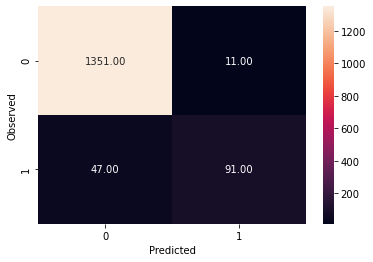

In [121]:
#Confusion matrix
#print(sns.heatmap(confusion_matrix(y_test,y_predict)))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1])
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

### 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class.

In [122]:
#Defining a new dataframe
coeff = pd.DataFrame()
#Setting column names
coeff['Features'] = X_test.columns
coeff['Coefficient'] = np.round(abs(loanmodel.coef_[0]),2)
coeff.sort_values(by='Coefficient',ascending=False)


,Features,Coefficient
12,Education_3,3.42
11,Education_2,3.23
5,CD Account,2.64
9,Family_3,1.60
10,Family_4,1.53
7,CreditCard,0.72
6,Online,0.55
0,Age,0.44
1,Experience,0.44
4,Securities Account,0.40


In [123]:
#All test data where predicted is not equal to observed
output.loc[output['Observed Personal Loan'] != output['Predicted Personal Loan']]

,Age,Experience,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_1,Observed Personal Loan,Predicted Personal Loan
4575,53,27,115,0.50,0,0,0,0,1,0,0,0,1,0,1,0
3383,46,22,135,4.10,0,0,1,0,0,1,0,0,0,1,1,0
459,35,10,200,3.00,0,0,0,0,1,0,0,0,0,1,0,1
2304,27,2,170,4.70,0,0,1,0,0,1,0,0,0,0,1,0
1731,43,19,125,2.40,0,0,1,0,0,1,0,0,0,0,1,0
1901,43,19,201,6.67,1,0,1,0,1,0,0,0,0,0,0,1
2996,42,18,103,3.33,1,1,1,1,0,0,0,0,0,0,1,0
3983,39,13,93,3.60,0,0,1,0,0,0,1,0,1,0,1,0
1793,35,9,113,0.80,0,0,1,0,0,1,0,0,1,0,1,0
3612,50,25,99,4.60,1,1,0,1,0,0,0,0,0,1,1,0


### 6. Business Insights

##### Confusion Matrix means
True Positive (observed=1,predicted=1): 91

Predicted that the liability customer will accept Personal loan and the customer did

False Positive (observed=0,predicted=1): 11

Predicted that the liability customer will accept Personal loan and the customer did not

True Negative (observed=0,predicted=0): 1351

Predicted that the liability customer will not accept Personal loan and the customer did not

False Negative (observed=1,predicted=0): 47

Predicted that the liability customer will not accept Personal loan and the customer did

##### Important features:
The top features on the basis of coefficient are:
- Advanced/Professional Education level
- Graduate Education level
- Customers having Certificate of Deposit account with the bank
- Family with 3 members 
- Family with 2 members
- Customers who use Credit Card from the bank

Income, Credit Card Average spending and Mortgage seems to have the lowest coefficient and hence relatively impacting the model less.

##### Important metric:

The objective here is to predict the likelihood of a customer buying personal loans that would help the bank in successfully getting a customer to take personal loan. Our focus should be to minimize missing out on potential customers i.e reduce false negatives. Hence 'Recall' is our important metric. The bank should not lose out on customers who would have taken a personal loan. 

With 66% recall rate, the model does a fair job of predicting the objective.